<h1 align="center"><span style='font-family:sans-serif'>Student University Admission Prediction</h1>

Use classification technique for
prediction of Graduate Admissions
from an Indian perspective

### About The Dataset

This dataset includes various information like GRE score, TOEFL score, university rating, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, research and chance of admit. In this dataset, 400 entries are included.

1. Serial No. - The ID of each invidual student.
2. GRE Score - Graduate Record Examination score out of 340 
3. TOEFL Score - Test of English as a Foreign Language score out of 120 
4. University Rating - out of 5 
5. SOP - Statement of Purpose - out of 5
6. LOR Letter of Recommendation , out of 5 
7. CGPA -  Cumulative Grade Point Average, Undergraduate GPA, out of 10 
8. Research - Experience,  either 0 or 1 
9. Chance of Admit - ranging from 0.0 to 1.0 

source : https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

In [2]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns


In [3]:
# load Data
admissions = pd.read_csv('Admission_Predict.csv')
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Make a copy
df = admissions.copy()

### Data Wrangling

In [5]:
df.shape

(400, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df.duplicated().sum()

0

In [8]:
# Renaming the columns
df.columns = ['serial_num', 'gre_score', 'toefl_score', 'university_rating',
              'sop', 'lor', 'cgpa_score', 'research_history', 
             'admission']

In [12]:
df['serial_num'].value_counts().sum()

400

serial_number is not needed in this data set as it is a unique number for each student

In [19]:
# Drop 'serial_num'
df.drop(['serial_num'], axis=1, inplace=True) 

### Exploratory Data Analysis

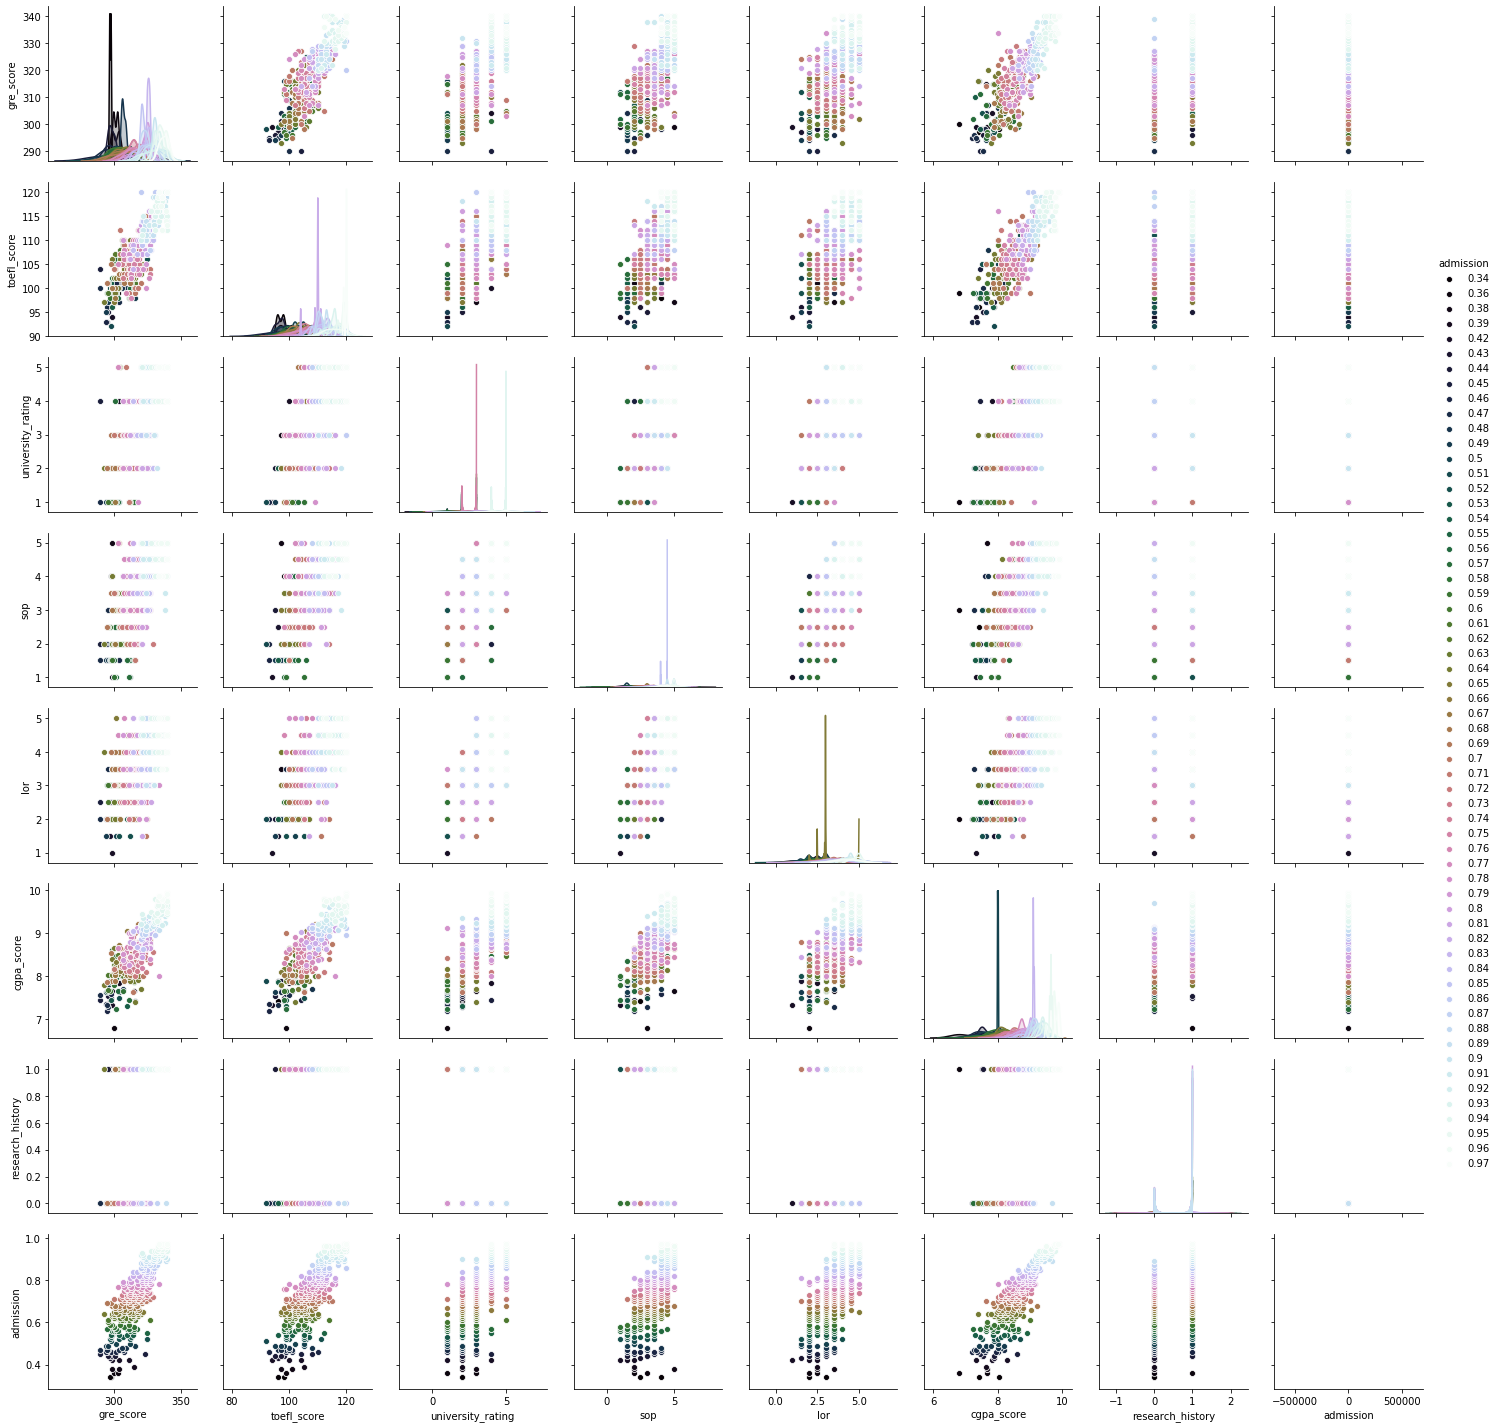

In [24]:
# General visual overview
sns.pairplot(data = df, hue='admission', palette = "cubehelix");

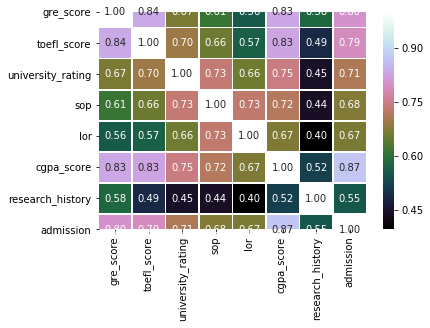

In [26]:
# heatmap to check for multicollinearity
sns.heatmap(df.corr(), annot=True, cmap="cubehelix", linewidths=0.8, fmt='.2f');

quite a number of this variables have above average correlation with the admission chances. But since cgpa_score had the highest correlation value at 0.87, we will explore it further.

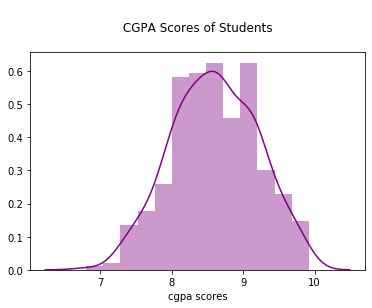

In [29]:
# Density Distribution of cgpa scores 
ax=sns.distplot(df.cgpa_score, kde=True, color='purple')
ax.set(xlabel='cgpa scores',
      #ylabel='% Distribution',
      title='\n CGPA Scores of Students \n');

The data is somewhat normally distributed, as the mean and median are almost the same,
however the mode is different, contributing to a slightly right skew without a tail.

In [30]:
df.cgpa_score.median(), df.cgpa_score.mean(), df.cgpa_score.mode()  

(8.61, 8.598924999999998, 0    8.0
 dtype: float64)

The mean, median and mode are not the same but are close to each other, 
contributing to shape of the graph being almost normally distributed,
 however looking at the mean and stardard deviation we see that data is not so spread out because it is off by ~0.6,
 as 75 % of the students got ~ 9 points while on average the score is 8.6
 the min and max values are almost not far off from the scoring ranging.
 All of this make the graph to have a slight right skew and no real outliers.

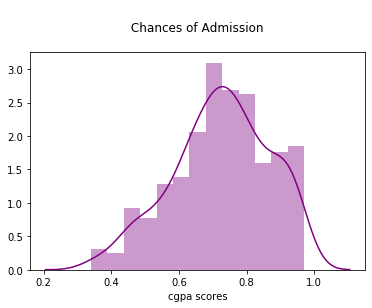

In [32]:
# Density Distribution of 'admission' 
ax=sns.distplot(df.admission, kde=True, color='purple')
ax.set(xlabel='cgpa scores',
      #ylabel='% Distribution',
      title='\n Chances of Admission \n');

In [33]:
df.admission.median(), df.admission.mean(), df.admission.mode() 

(0.73, 0.7243499999999996, 0    0.64
 dtype: float64)

`admission` just like `cgpa score` has the same median and mean but almost similiar mode,
causing a slighly skew in distribution of the `admission` data.

In [15]:
df.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor',
       'cgpa_score', 'research_history', 'admission'],
      dtype='object')

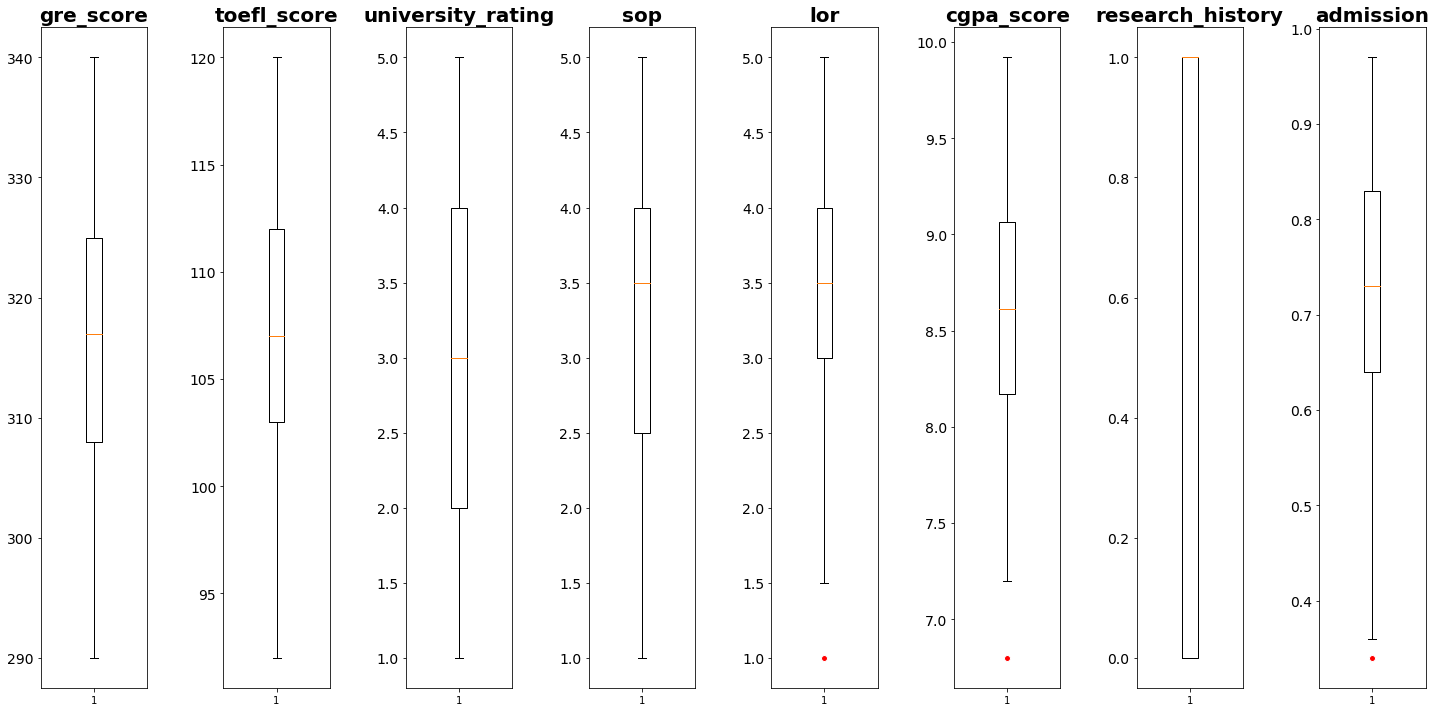

In [35]:
# box plot to check if data is skewed, understand the measure of spread and identify possible outliers

# create subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

# make subplots
fig, axs = plt.subplots(1,len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i],
              flierprops=red_circle)
    df.iloc[:,i]
    
    ax.set_title(df.columns[i],
            fontsize=20,
            fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout();

In [36]:
# statistical summary of columns with outliers

df[['lor', 'cgpa_score','admission']].describe(include='all')

,lor,cgpa_score,admission
count,400.000000,400.000000,400.000000
mean,3.452500,8.598925,0.724350
std,0.898478,0.596317,0.142609
min,1.000000,6.800000,0.340000
25%,3.000000,8.170000,0.640000
50%,3.500000,8.610000,0.730000
75%,4.000000,9.062500,0.830000
max,5.000000,9.920000,0.970000


We seem to have outliers in the `lor` at 1.0, `cgpa_score` at 6.8 and `admission` at 0.34 in lower part of the graphs. Making the distribution slightly left skewed. These are not too extreme and can be expected because there are factors that could lead to them. 

### Modelling

In [37]:
# look at df again
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa_score,research_history,admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
# check the distinct values each column has
df.nunique()

gre_score             49
toefl_score           29
university_rating      5
sop                    9
lor                    9
cgpa_score           168
research_history       2
admission             60
dtype: int64

In [39]:
# Split data into 'X' and 'y'
X = df.drop('admission', axis=1)
y = df['admission']

#### Building the Model

In [40]:
# Look at feature matrix
X

,gre_score,toefl_score,university_rating,sop,lor,cgpa_score,research_history
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [41]:
# Look at the vector
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: admission, Length: 400, dtype: float64

### Data Preprocessing

Despite the fact that the target and all of the attributes are numerical, the scale is not the same and the numbers come in two different forms: discrete and continuus.
To make them comparable in size, we must scandardize them.

In [42]:
# Feature Scaling with StandardScaler
from sklearn.preprocessing import StandardScaler

In [44]:
# build the scaler model
scaler = StandardScaler()

In [45]:
# Fit using train set
scaler.fit(X);

In [46]:
# transform X 
X_scaled = scaler.transform(X)

In [47]:
# verify min values of all features
X_scaled.min(axis=0)

array([-2.33936728, -2.54209798, -1.82745726, -2.38661285, -2.73303589,
       -3.02050351, -1.09997489])

In [48]:
# verify max values of all features
X_scaled.max(axis=0)

array([2.02390285, 2.076899  , 1.67425725, 1.59107523, 1.724515  ,
       2.21816455, 0.90911166])

In [49]:
# split into train and test
from sklearn.model_selection import train_test_split

In [50]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                   y,
                                                   test_size=0.2)

### Choosing a Model

For this regression problem we are try out:
* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor

In [57]:
# import the models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [58]:
# put models in a dictionary

models = {'Logistic Regression': LinearRegression(),
         'Tree': DecisionTreeRegressor(),
         'Random Forest': RandomForestRegressor(), 
         }

# create function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models
    models : a dict of different regression sklearn models
    X_train : training data , no labels
    X_test : testing data, no labels
    y_train : training labels
    y_test: test labels
    '''    
    # make a dict to keep model scores
    
    model_scores = {}
    
    # loop through models
    
    for name, model in models.items():
        # fit model to data
        model.fit(X_scaled, y)
        # Evaluate model and append score to model_score
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [59]:
model_scores = fit_and_score(models=models,
                            X_train=X_scaled,
                            X_test=X_test,
                            y_train=y,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.79382229890995,
 'Tree': 1.0,
 'Random Forest': 0.9510425211628316}

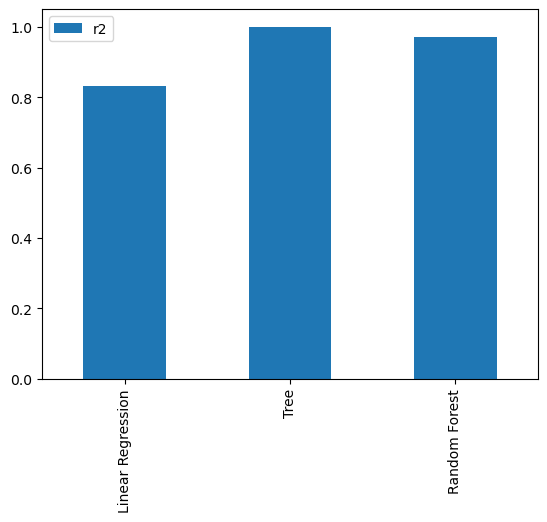

In [34]:
# visualizing the models performance
model_compare = pd.DataFrame(model_scores, index=['r2'])
model_compare.T.plot.bar();

   > At a perfect score of 1.0 DecisionTreeRegressor outperforms LinearRegression and RandomForestRegressor, however the r2 score is not good enough indicator of the ideal model the error will also be checked.

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
# make function to evaluate
def evaluate_preds(y_true, y_preds):
    """
    Function performs evaluation comparison on y_true labels vs y_preds,
    on our regression model
    """
    r2 = r2_score(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    
    metric_dict = {'r2_score': r2,
                   'mean_absolute_error' : mean_absolute_error,
                   'mean_squared_error' : mean_squared_error
                  }
    print(f'r2 score: {r2:.2f}')
    print(f'mean absolute error: {mae:.3f}')    
    print(f'mean squared errror: {mse:.4f}')   
    
    return metric_dict

In [62]:
# Tree base line model
tree = DecisionTreeRegressor().fit(X_scaled, y)

In [63]:
tr_y_preds = tree.predict(X_test)

In [64]:
# evaluate predictions
tr_y_metrics = evaluate_preds(y_test, tr_y_preds)

r2 score: 1.00
mean absolute error: 0.000
mean squared errror: 0.0000


In [65]:
# Randon Forest base line model
rfr = RandomForestRegressor().fit(X_scaled, y)

In [66]:
rfr_y_preds = rfr.predict(X_test)

In [67]:
# evaluate predictions
rfr_y_metrics = evaluate_preds(y_test, rfr_y_preds)

r2 score: 0.96
mean absolute error: 0.019
mean squared errror: 0.0008


In [68]:
# Linear base line model
lr = LinearRegression().fit(X_scaled, y)

In [69]:
# base line predictions
lr_y_preds = lr.predict(X_test)

In [70]:
# evaluate predictions
lr_y_metrics = evaluate_preds(y_test, lr_y_preds)

r2 score: 0.79
mean absolute error: 0.046
mean squared errror: 0.0041


Decision Tree Model seems to be overfitting because its performance is 100% and has optimal error of zero for both MAE and MSE. Because Tree model have a tendency to divide based on several possible feature combinations, decision trees are considered to be ineffective for applying regression and forecasting continuous values. Gradient Boosting Decision Tree (GBDT) can be investigated, however in our instance we will modify the RandomForestRegressor and see if we can't lower the error further because we are working with a pretty small dataset. Decision Tree is not appropriate because of this.
Due to its difficulties with multicollinear data, the linear regression performed less admirably than the other two, as expected.

### Further Evaluations of Random Forest Model

In [71]:
# look at the difference
df1 = pd.DataFrame(data={'actual values': y_test,
                        'predicted values': rfr_y_preds})
df1['differences'] = df1['predicted values'] - df1['actual values']
df1.head()

,actual values,predicted values,differences
399,0.95,0.949,-1.000000e-03
299,0.71,0.697,-1.300000e-02
71,0.96,0.956,-4.000000e-03
129,0.92,0.920,-1.110223e-16
128,0.84,0.795,-4.500000e-02


In [72]:
# Squared differences
df1['squared differences'] = np.square(df1['differences'])
df1.head()

,actual values,predicted values,differences,squared differences
399,0.95,0.949,-1.000000e-03,1.000000e-06
299,0.71,0.697,-1.300000e-02,1.690000e-04
71,0.96,0.956,-4.000000e-03,1.600000e-05
129,0.92,0.920,-1.110223e-16,1.232595e-32
128,0.84,0.795,-4.500000e-02,2.025000e-03


In [73]:
df1_large_error = df1.copy()
df1_large_error.iloc[0]['squared_differences'] = 16

In [74]:
df1_large_error.head()

,actual values,predicted values,differences,squared differences
399,0.95,0.949,-1.000000e-03,1.000000e-06
299,0.71,0.697,-1.300000e-02,1.690000e-04
71,0.96,0.956,-4.000000e-03,1.600000e-05
129,0.92,0.920,-1.110223e-16,1.232595e-32
128,0.84,0.795,-4.500000e-02,2.025000e-03


In [75]:
# Calculate MSE with large error
df1_large_error['squared differences'].mean()

0.0007603624999999988

Since we dont have significant outliers in the differences, even if we introduce a large error value. The MSE is stil less than the MAE, and averages itself out to achieve the original MAE value.

#### Evaluation using `scoring` parameter

In [76]:
# import cross validation
from sklearn.model_selection import cross_val_score

In [77]:
# r2 
cv_r2 = cross_val_score(rfr, X_scaled, y, cv=5, scoring='r2')
cv_r2

array([0.54508759, 0.71516974, 0.69774736, 0.79912217, 0.76329427])

In [78]:
np.mean(cv_r2)

0.7040842251927628

r2 is 0.74 , which less compared to baseline model.

In [79]:
print(f'The cross validated r2 score is: {np.mean(cv_r2)*100:.2f}%')

The cross validated r2 score is: 70.41%


In [80]:
# mae
cv_mae = cross_val_score(rfr, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.054764999999999994

In [81]:
cv_mae

array([-0.07735  , -0.0632125, -0.043825 , -0.03685  , -0.0525875])

In [82]:
# mse
cv_mse = cross_val_score(rfr, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.0060988925

In [83]:
cv_mse

array([-0.01144792, -0.00666031, -0.00336401, -0.00256138, -0.00646084])

With cross validation the model perfomances drops to 0.74 and mae increase to 0.052 as well as mse to 0.0054.

### Tuning RandomForestRegressor using:

  > **1. RandomizedSearchCV**

In [84]:
# RandomForestRegressor Baseline Hyperparameters
rfr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Parameters we will try to adjust 
`n_estimators`, `max_features`, `max_depth`, `min_samples_split`, `min_samples_leaf` and `bootstrap`

In [85]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [86]:
# create random grid
rand_grid = {'n_estimators':[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'bootstrap':[True, False]
        }

In [ ]:
# Redefine Model
rf = RandomForestRegressor()

# random search of parameters using default 5 fold validation over 50 combinations
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=rand_grid,
                               n_iter=50,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)
# fit random search model
rf_random.fit(X_scaled, y);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.6s


In [ ]:
# best hyperparameters
rf_random.best_params_

In [ ]:
# best score
rf_random.best_score_

In [ ]:
# make predictions
rf_y_preds = rf_random.predict(X_test)
# evaluate random search
rf_y_metrics = evaluate_preds(y_test, rf_y_preds)

The perfomance is lower than baseline from 0.97 to 0.90
and MAE is more from 0.019 to 0.034, MSE from 0.0007 to 0.0022 

> 2. **GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# create param grid
param_grid = {'bootstrap':[True],
             'max_depth': [80, 90, 100, 110],
             'max_features': [2, 3],
             'min_samples_leaf': [3, 4, 5],
             'min_samples_split': [8, 10, 12],
             'n_estimators': [100, 200, 300, 1000]}

In [ ]:
# redifine model
rf1 = RandomForestRegressor()

# instance of grid search model using cv 5
grid_search = GridSearchCV(estimator=rf1,
                          param_grid=param_grid,
                          cv=5,
                          n_jobs=-1,
                          verbose=2)
# fit grid search
grid_search.fit(X_scaled,y);

In [ ]:
# best hyperparameters
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
# make predictions
rf1_y_preds = rf_random.predict(X_test)
# evaluate grid search
rf1_y_metrics = evaluate_preds(y_test, rf1_y_preds)

GridSearchCV performed the same as RandomizedSearchCV.

### Improving the Linear Regression Model

> **By using Modified versions of Linear Regression**

In [ ]:
# import Ridge and Lasso models
from sklearn.linear_model import Ridge, LassoCV, ElasticNetCV

In [ ]:
# put models in a dictionary
models = {'Ridge' : Ridge(),
          'Lasso' : LassoCV(),
          'Elastic': ElasticNetCV() 
         }

# create function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models
    models : a dict of different regression sklearn models
    X_train : training data , no labels
    X_test : testing data, no labels
    y_train : training labels
    y_test: test labels
    '''    
    # make a dict to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit model to data
        model.fit(X_scaled, y)
        # Evaluate model and append score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                            X_train=X_scaled,
                            X_test=X_test,
                            y_train=y,
                            y_test=y_test)
model_scores

Ridge fared slightly less than the cross-validated Lasso and ElaticNet. Since we only have a limited dataset, it is a good idea to use the Ridge, Lasso, and Elastic Regularization algorithms. However, Ridge will be more appropriate because there are just 7 predictors, all of which are significant in generating predictions. Therefore, we will modify it to enhance its predictive performance.

In [ ]:
# Instance of Ridge
ridge = Ridge().fit(X_scaled, y)

In [ ]:
# base line predictions
rr_y_preds = ridge.predict(X_test)
# make first 5 prdictions
rr_y_preds[:5]

In [ ]:
# evaluate predictions
rr_y_metrics = evaluate_preds(y_test, rr_y_preds)

At default parameters the Ridge model has MAE of 0.037

In [ ]:
# ridge baseline hyperparameters
ridge.get_params()

#### Tuning by hand


In [ ]:
# Tuning only the alpha 
# Instance of Ridge
ridge1 = Ridge(alpha=0.1).fit(X_scaled, y)
rr1_y_preds = ridge1.predict(X_test)

In [ ]:
# make predictions
rr1_y_preds = ridge1.predict(X_test)
# evaluate predictions
rr1_y_metrics = evaluate_preds(y_test, rr1_y_preds)

The alpha tuned ridge gives the same MAE value of 0.037

In [ ]:
# looking at Linear Regression coeficients
coef_dict_baseline = {}
for coef, feat in zip(lr.coef_,df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

In [ ]:
# looking at Ridge coeffients
coef_dict_ridge = {}
for coef, feat in zip(ridge1.coef_,df.columns):
    coef_dict_ridge[feat] = coef
coef_dict_ridge

The Linear Regresion Baseline Model and the Ridge tuned model's coefficient values are somewhat similiar, so the penalization using alpha did not make much of a difference. 

#### Tune using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
# create a grid of hyperparameters we want to adjust
grid = {'alpha':[0.001, 0.01, 0.1, 0.8, 1],
        'fit_intercept': [True,False],
        'random_state': [0, 1, 2, 18, 36, 42, 1234],
        'max_iter': [10000, 1000, 100],
        'normalize': [True, False],
        'solver':['auto', 'svd', 'cholesky', 'lsqr',
                 'sparse_cg', 'sag', 'saga']
        }

In [ ]:
# Instance of Ridge
ridge2 = Ridge()

# setup GridSearchCV
gs_ridge = GridSearchCV(estimator=ridge2,
                        param_grid=grid,
                        cv=5,
                        scoring='r2',
                        n_jobs=-1,
                        verbose=2)
# fit GridSearchCV version of Ridge
gs_ridge.fit(X_scaled, y);

In [ ]:
gs_ridge.best_params_

In [ ]:
gs_ridge.best_score_

In [ ]:
# make predictions
gs_y_preds = gs_ridge.predict(X_test)
# evaluate predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

### Summary 
Performance in a continuous regression case is determined by minimizing error. The negative sign in the MAE and MSE is ignored while examining the results. As we can see, the baseline models worked well, but the DecisionTreeRegressor was overfitting. 
I tried to tune the RandomForestRegressor to reduce errors, but this did not work because I had a reduction in the coefficient of determination and an increase in the error. So I also tried to tune the LinearRegression model using Ridge and I found an improvement from 0.83 to 0.85 and reduced MAE,MSE values of 0.037 and 0.028. 
All in all, the baseline RandomForestRegressor model did great at r2 score: 0.97, mean absolute error: 0.019 and mean squared errror: 0.0007.

In general, obtaining more data can have a significant impact on the models' effectiveness.